In [1]:
from matplotlib_venn import venn3,venn2
from matplotlib import rc 
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pymodulon.io import *
from pymodulon.plotting import *
import os
from os import path


In [2]:
plt.rcParams["font.family"] = "Times New Roman"

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


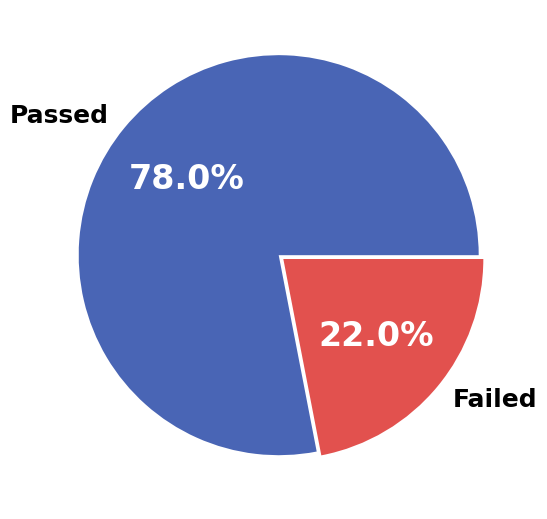

In [3]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_axes([0,0,1,1])

ax.axis('equal')

quality = ['Passed', 'Failed']
colors = ['#4965B5','#E2514E']
explode = [0.03,0]
samples = [263,74]

pictures,l_text,p_text = ax.pie(samples, labels = quality,explode = explode, colors = colors,autopct='%3.1f%%')
for t in l_text:
    t.set_font("Times New Roman")
    t.set_size(18)
    t.set_weight("bold")
for t in p_text:
    t.set_color("white")
    t.set_font("Times New Roman")
    t.set_size(24)
    t.set_weight("bold")
plt.show()

In [4]:
DF_metadata = pd.read_csv(os.path.join('..','data','SraRunInfo.tsv'),index_col = 0)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


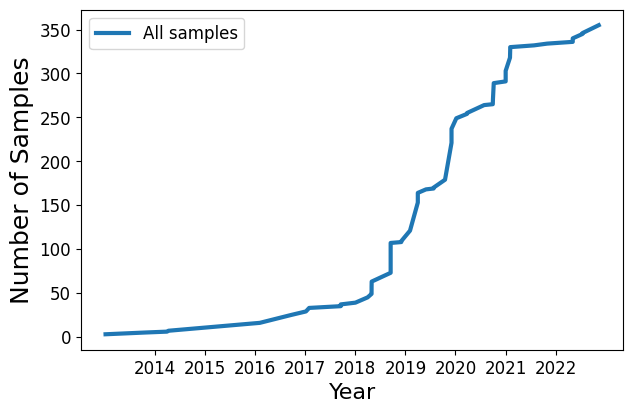

In [5]:
DF_metadata['ReleaseDate'] = pd.to_datetime(DF_metadata['ReleaseDate'])
first_date = min(DF_metadata['ReleaseDate'])
last_date = max(DF_metadata['ReleaseDate'])
date_range = pd.date_range(start=first_date,end=last_date,freq='YS')
fig,ax = plt.subplots(figsize=(7,5))
growth = DF_metadata['ReleaseDate'].value_counts().sort_index().cumsum()
growth.plot(ax=ax,label='All samples')
plt.xticks(date_range,date_range.strftime('%Y'),rotation=0,ha='center')
ax.tick_params(labelsize=12)
ax.set_xlabel('Year',fontsize=16)
ax.set_ylabel('Number of Samples',fontsize=18)
ax.lines[0].set_linewidth(3.0)
plt.legend(fontsize=12)

In [6]:
ica_data = load_json_model(os.path.join('..','data','cgu.json.gz'))

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


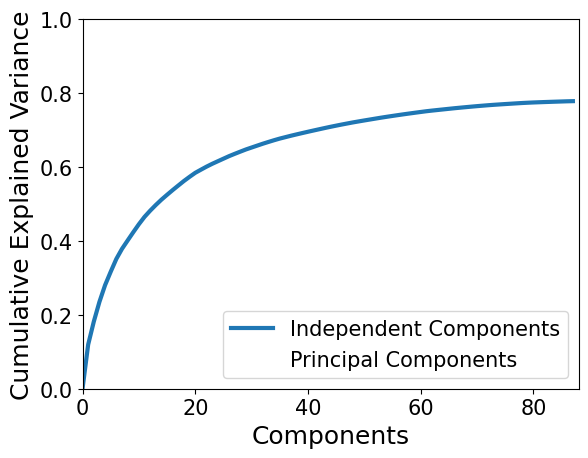

In [7]:
rc('lines', linewidth=3, linestyle='-')
fig = plot_explained_variance(ica_data)
fig.set_xlabel("Components",fontsize=18)
fig.set_ylabel("Cumulative Explained Variance",fontsize=18)
fig.lines[0].set_linewidth(3.0)
fig.lines[1].set_linewidth(0.0)
fig.legend(fontsize=15)
fig.tick_params(labelsize=15)

# Zur iModulon

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


Text(76.09722222222221, 0.5, 'Zur Gene Weight')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


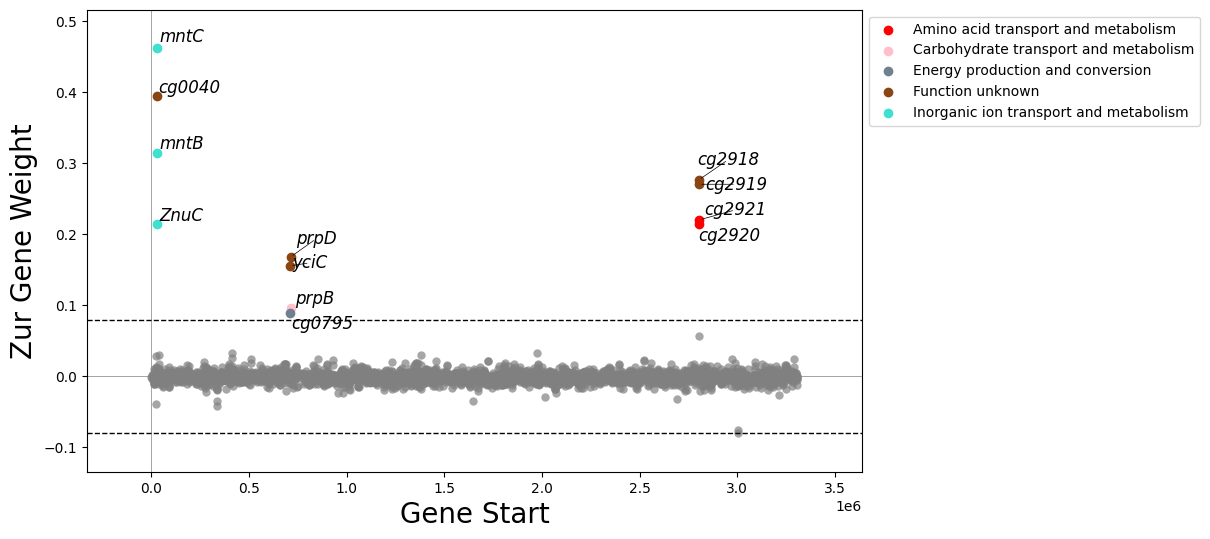

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = plot_gene_weights(ica_data,'Zur', ax=ax)
ax.set_xlabel("Gene Start",fontsize=20)
ax.set_ylabel("Zur Gene Weight",fontsize=20)

Text(0, 0.5, 'mntB Expression')

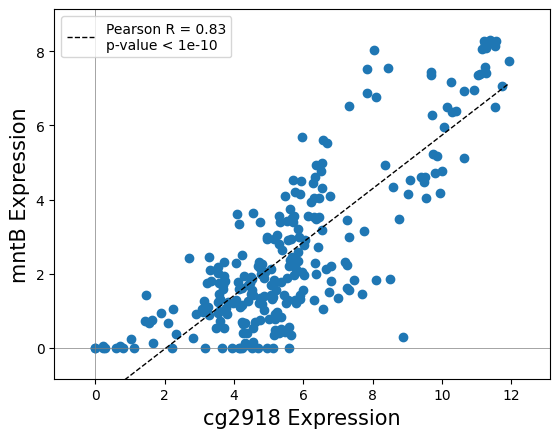

In [9]:
fig = compare_expression(ica_data,'cg2918','mntB')
fig.set_xlabel("cg2918 Expression",fontsize = 15)
fig.set_ylabel("mntB Expression", fontsize = 15)

Text(0, 0.5, 'DtxR iModulon Activity')

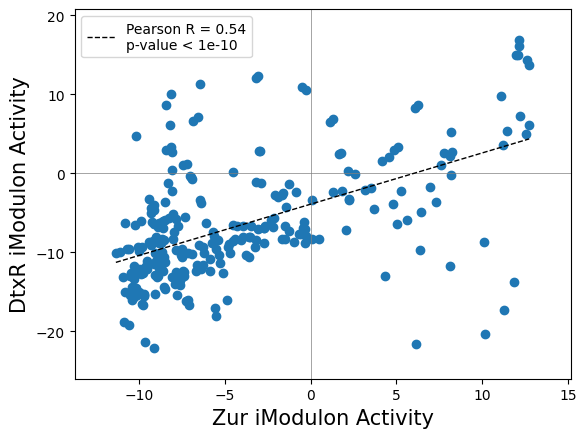

In [10]:
fig = compare_activities(ica_data,'Zur','DtxR')
fig.set_xlabel("Zur iModulon Activity",fontsize = 15)
fig.set_ylabel("DtxR iModulon Activity", fontsize = 15)

# SufR iModulon

Text(76.09722222222221, 0.5, 'SufR Gene Weight')

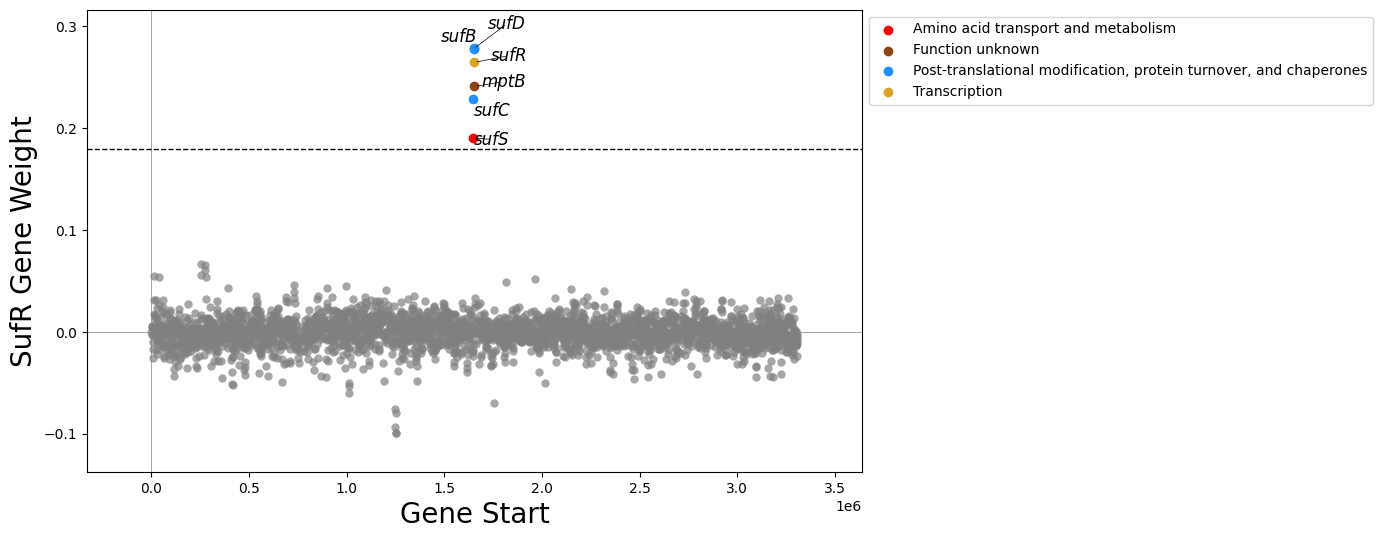

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = plot_gene_weights(ica_data,'SufR', ax=ax)
ax.set_xlabel("Gene Start",fontsize=20)
ax.set_ylabel("SufR Gene Weight",fontsize=20)

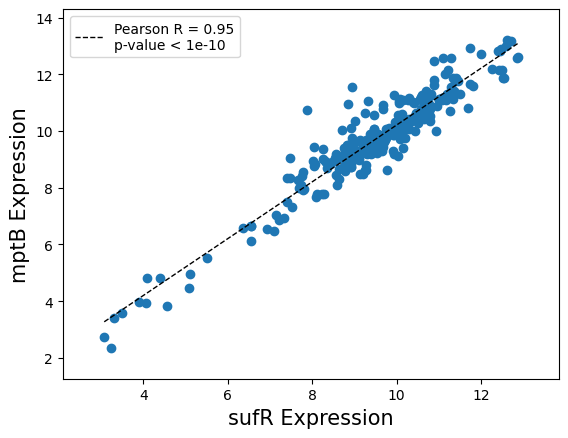

In [12]:
fig = compare_expression(ica_data,'sufR','mptB')
fig.set_xlabel("sufR Expression",fontsize = 15)
fig.set_ylabel("mptB Expression", fontsize = 15)
plt.savefig(r'../figures/sufR-mptB.png', dpi=200,transparent=True,bbox_inches='tight')

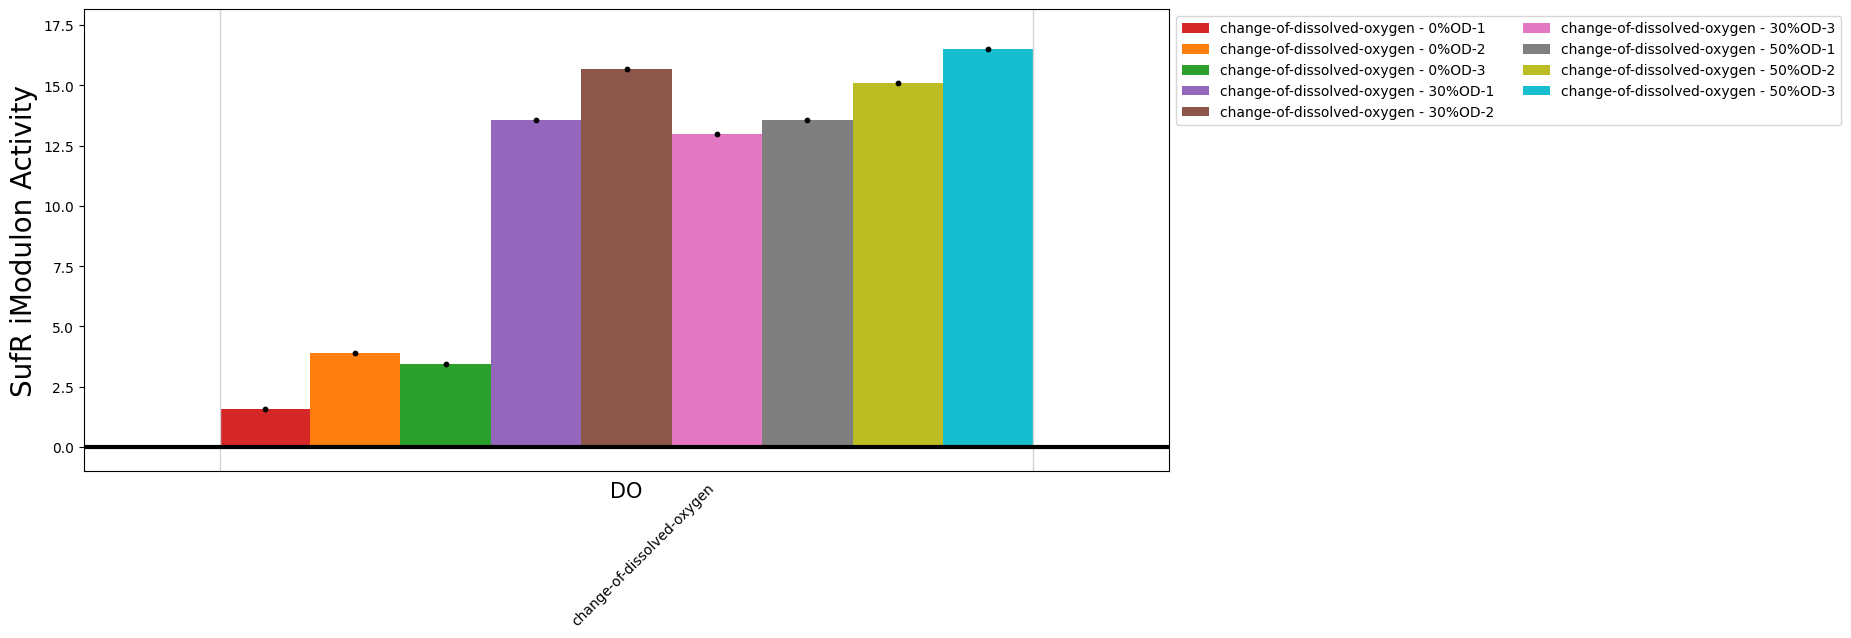

In [13]:
fig, ax = plt.subplots(figsize=(14, 6))
figure = plot_activities(ica_data,"SufR",projects="change-of-dissolved-oxygen", ax=ax)
figure.set_xlabel("DO",fontsize = 15)
figure.set_ylabel("SufR iModulon Activity",fontsize = 20)
plt.savefig(r'../figures/sufR-activity.png', dpi=200,transparent=True,bbox_inches='tight')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


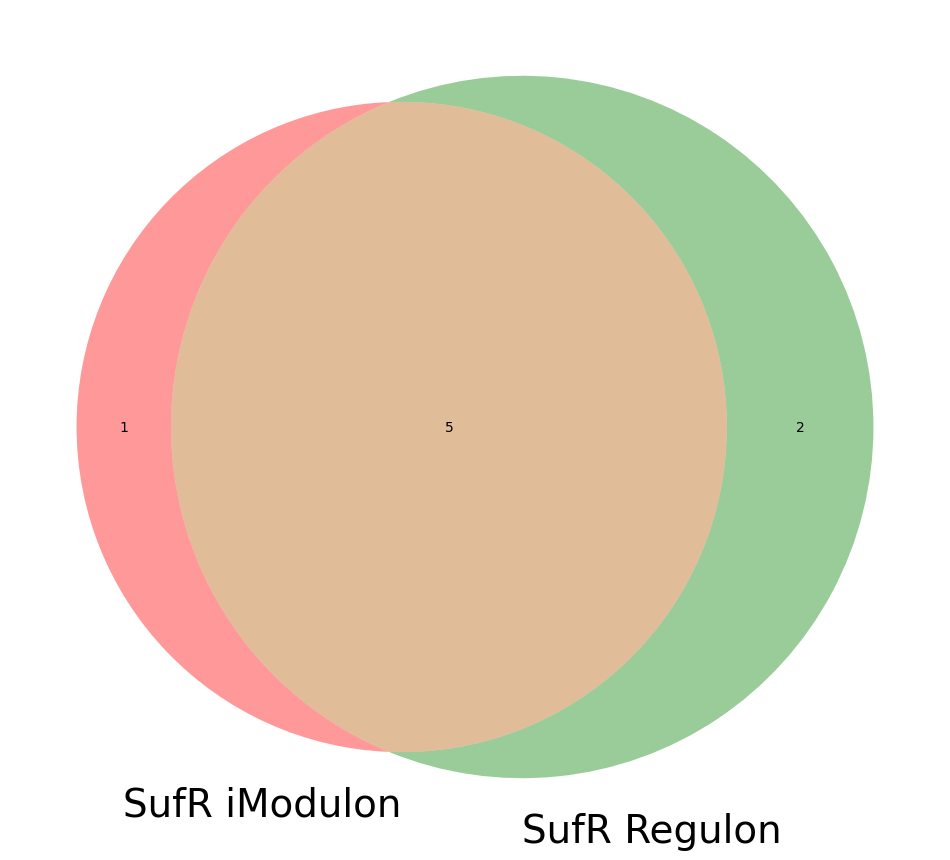

In [14]:
imodulon_name='SufR'
imodulon_cir = set(ica_data.view_imodulon(imodulon_name).index)

regulon_cir = set(ica_data.trn.loc[ica_data.trn.regulator=="WA5_RS07815"].gene_id.values)

fig, ax = plt.subplots(figsize=(12, 12))

out = venn2(
    subsets=[imodulon_cir, regulon_cir],
    set_labels=(imodulon_name+' iModulon', imodulon_name+' Regulon'),
    ax=ax
)
for text in out.set_labels:
    text.set_fontsize(28)
plt.savefig(path.join('..','figures',imodulon_name+'_venn.png'), dpi=200,transparent=True,bbox_inches='tight')

# ArgR iModulon

Text(67.47222222222221, 0.5, 'ArgR Gene Weight')

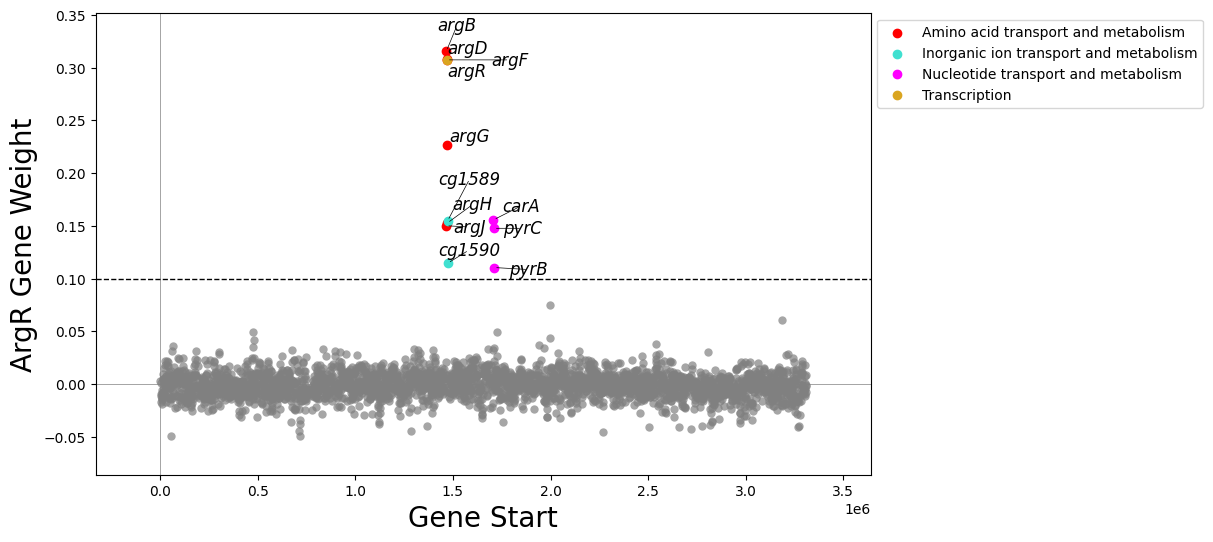

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = plot_gene_weights(ica_data,'ArgR', ax=ax)
ax.set_xlabel("Gene Start",fontsize=20)
ax.set_ylabel("ArgR Gene Weight",fontsize=20)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


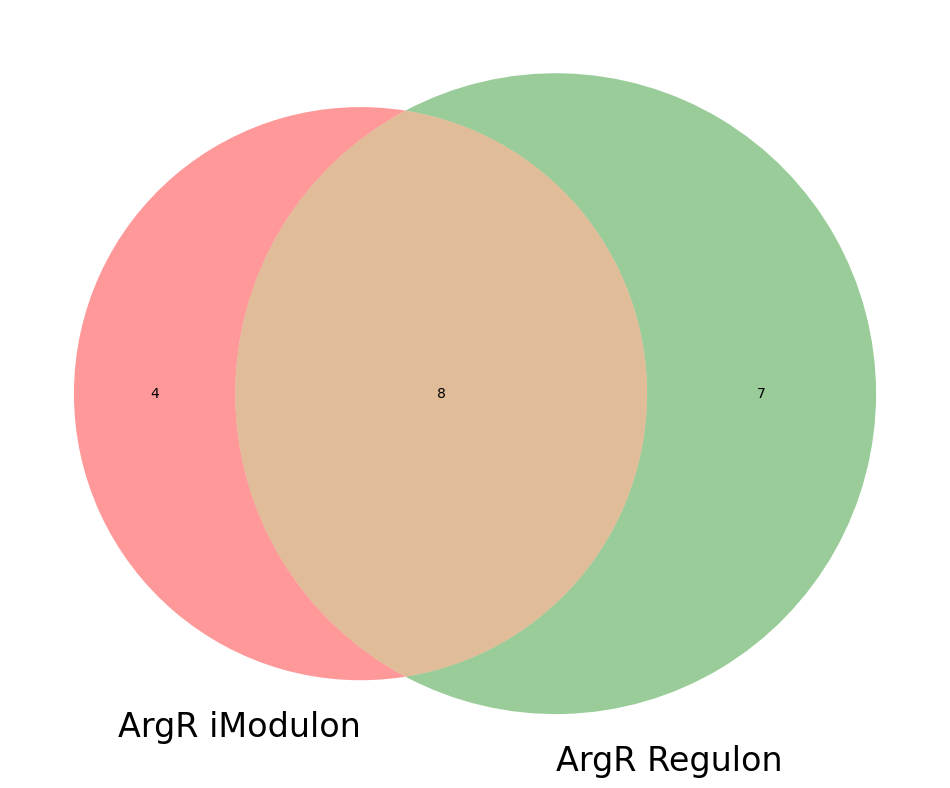

In [16]:
imodulon_name='ArgR'
imodulon_cir = set(ica_data.view_imodulon(imodulon_name).index)

regulon_cir = set(ica_data.trn.loc[ica_data.trn.regulator=="WA5_RS06975"].gene_id.values)

fig, ax = plt.subplots(figsize=(12, 12))

out = venn2(
    subsets=[imodulon_cir, regulon_cir],
    set_labels=(imodulon_name+' iModulon', imodulon_name+' Regulon'),
    ax=ax
)
for text in out.set_labels:
    text.set_fontsize(24)
plt.savefig(path.join('..','figures',imodulon_name+'_venn.svg'), dpi=200,transparent=True,bbox_inches='tight')

In [17]:
ica_data.thresholds["ArgR"]

0.1

In [18]:
ica_data.change_threshold('ArgR', 0.10)